In [ ]:
with torch.no_grad():
    for i, (data, _) in enumerate(train_loader):
        data = data[:, 0, :, :].squeeze(1)
        B, N, D = data.size()
        data = data.view(B, args["rows"], args["cols"], D)
        plt.figure(figsize=(10, 8))
        plt.imshow(data[2, :, :, 1].cpu().numpy(), cmap='viridis', aspect='auto')
        plt.colorbar(label='no. of cars')
        plt.title('Heatmap showing traffic in the city')
        plt.xlabel('cols')
        plt.ylabel('rows')
        plt.show()

In [1]:
import sys
sys.path.append('.')
sys.path.append('..')
from lib.dataloader import get_dataloader
import torch
import matplotlib.pyplot as plt

# start_epoch = args.start_epoch
# num_epochs = args.num_epochs

args = {"data_dir": r"data", "dataset": "NYCTaxi", "batch_size": 1, "test_batch_size": 32, "rows": 20, "cols": 10, "num_epochs": 100}
dataloader = get_dataloader(
    data_dir=args['data_dir'], 
    dataset=args['dataset'], 
    batch_size=args['batch_size'], 
    test_batch_size=args['test_batch_size'],
    scalar_type='Standard'
)
train_loader = dataloader['train']
test_loader = dataloader['test']
val_loader = dataloader['val']




!!Scaling is off!!


data['x_train'].shape:  (1912, 35, 200, 2) (1912, 1, 200, 2) 

!!train shuffle is false!!




len(data_train): 1912
y_train.shape: (1912, 1, 200, 2)
in_train.shape: (1912, 1, 200)
in_train_avg.shape: (20, 10)


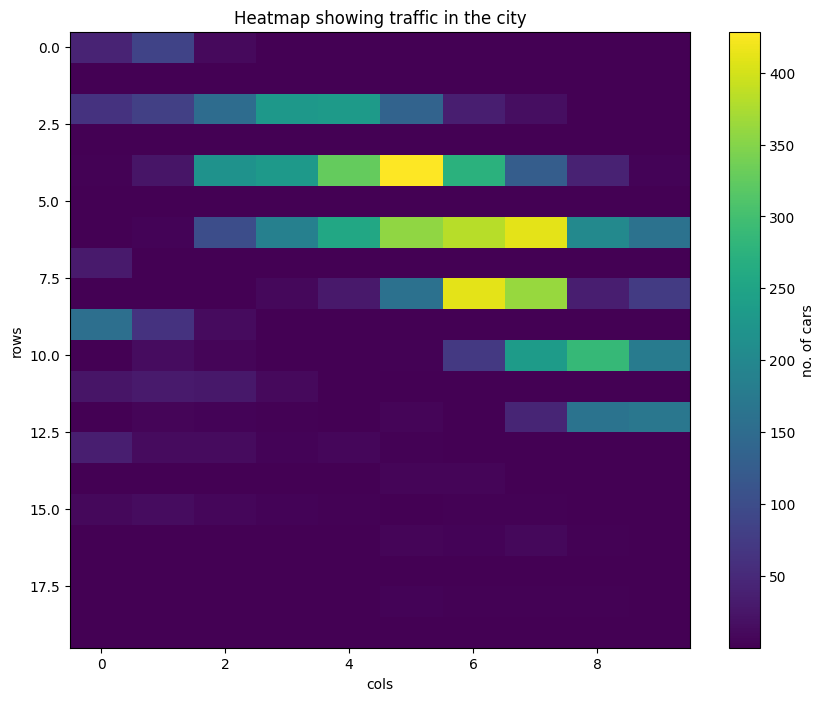

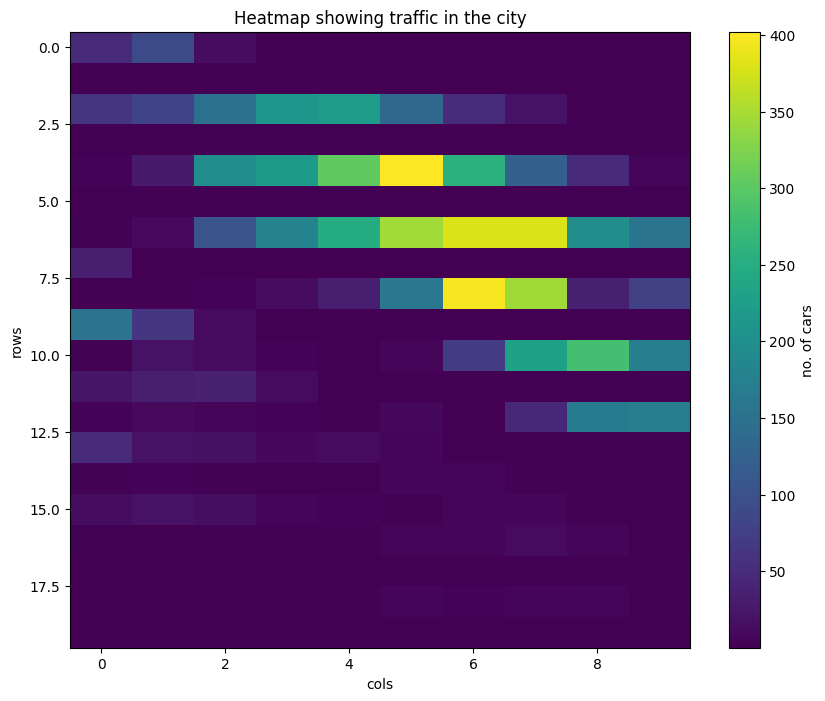

In [27]:
import numpy as np
x_train = np.load(r'E:\estudy\ST-SSL\code\ST-SSL\data\NYCTaxi\train.npz')["x"]
y_train = np.load(r'E:\estudy\ST-SSL\code\ST-SSL\data\NYCTaxi\train.npz')["y"]
print(f"len(data_train): {len(x_train)}")
print(f"y_train.shape: {y_train.shape}")
in_train = y_train[:, :, :, 0]
out_train = y_train[:, :, :, 1]
print(f"in_train.shape: {in_train.shape}")
in_train_avg = np.mean(in_train, axis=0).squeeze(0).reshape(20, 10)
out_train_avg = np.mean(out_train, axis=0).squeeze(0).reshape(20, 10)
print(f"in_train_avg.shape: {in_train_avg.shape}")

inout_train_avg = (in_train_avg + out_train_avg)/2
plt.figure(figsize=(10, 8))
plt.imshow(in_train_avg, cmap='viridis', aspect='auto')
plt.colorbar(label='no. of cars')
plt.title('Heatmap showing traffic in the city')
plt.xlabel('cols')
plt.ylabel('rows')
plt.show()
plt.figure(figsize=(10, 8))
plt.imshow(inout_train_avg, cmap='viridis', aspect='auto')
plt.colorbar(label='no. of cars')
plt.title('Heatmap showing traffic in the city')
plt.xlabel('cols')
plt.ylabel('rows')
plt.show()

inout_train_avg_pd.shape: (20, 10)


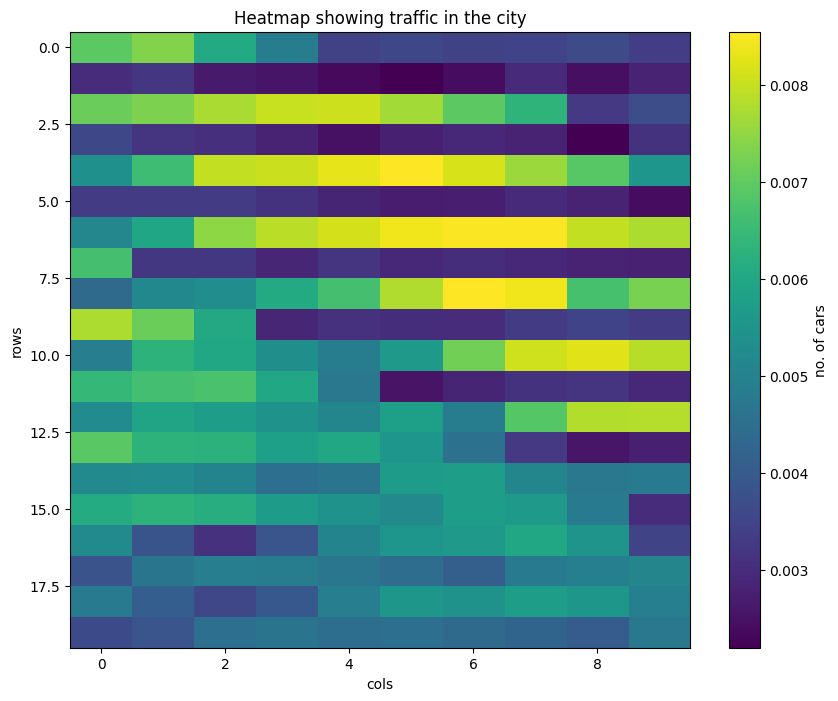

In [688]:
in_train_avg_flat = in_train_avg.flatten()
inout_train_avg_pd = np.power(inout_train_avg, 0.1)
inout_train_avg_pd = inout_train_avg_pd/np.sum(inout_train_avg_pd, axis=(0, 1))

print(f"inout_train_avg_pd.shape: {inout_train_avg_pd.shape}")
# np.save(r'E:\estudy\ST-SSL\code\ST-SSL\data\NYCTaxi\grid_pd.npy', inout_train_avg_pd)
plt.figure(figsize=(10, 8))
plt.imshow(inout_train_avg_pd, cmap='viridis', aspect='auto')
plt.colorbar(label='no. of cars')
plt.title('Heatmap showing traffic in the city')
plt.xlabel('cols')
plt.ylabel('rows')
plt.show()

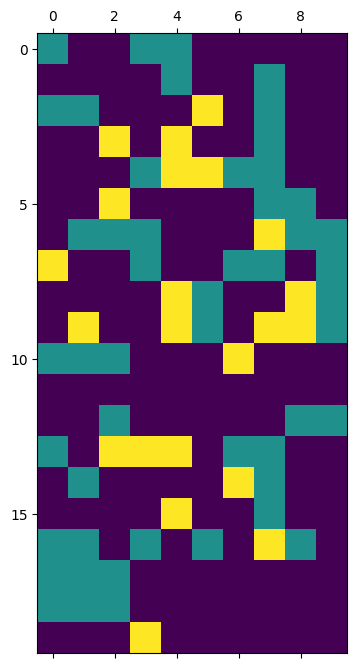

50
22


In [733]:
inout_train_avg
inout_train_avg_pd

inout_train_avg_pd_flat = inout_train_avg_pd.flatten()
inout_train_avg_flat = inout_train_avg.flatten()

inout_ctxt = np.random.choice(inout_train_avg_flat.size, size=50, replace=False, p=inout_train_avg_pd_flat)
# print(inout_ctxt)
mask = np.zeros(inout_train_avg_flat.shape)
mask[inout_ctxt] = 1
# print(np.reshape(mask, (20, 10)))

inout_train_avg_pd_flat[inout_ctxt] = 0 ## set probability for the chosen context nodes to 0
inout_train_avg_pd_flat /= inout_train_avg_pd_flat.sum() ## normalize the probabilities again

inout_trgt = np.random.choice(inout_train_avg_flat.size, size=22, replace=False, p=inout_train_avg_pd_flat)
mask[inout_trgt] = 2

plt.matshow(np.reshape(mask, (20, 10)), cmap='viridis')
plt.show()
# print(np.reshape(mask, (20, 10)))
print(sum(mask == 1))
print(sum(mask == 2))

In [3]:
print("len(train_loader):", len(train_loader))
for i, (data, target) in enumerate(train_loader):
    print(data.shape, target.shape)

len(train_loader): 1912
torch.Size([1, 35, 200, 2]) torch.Size([1, 1, 200, 2])
torch.Size([1, 35, 200, 2]) torch.Size([1, 1, 200, 2])
torch.Size([1, 35, 200, 2]) torch.Size([1, 1, 200, 2])
torch.Size([1, 35, 200, 2]) torch.Size([1, 1, 200, 2])
torch.Size([1, 35, 200, 2]) torch.Size([1, 1, 200, 2])
torch.Size([1, 35, 200, 2]) torch.Size([1, 1, 200, 2])
torch.Size([1, 35, 200, 2]) torch.Size([1, 1, 200, 2])
torch.Size([1, 35, 200, 2]) torch.Size([1, 1, 200, 2])
torch.Size([1, 35, 200, 2]) torch.Size([1, 1, 200, 2])
torch.Size([1, 35, 200, 2]) torch.Size([1, 1, 200, 2])
torch.Size([1, 35, 200, 2]) torch.Size([1, 1, 200, 2])
torch.Size([1, 35, 200, 2]) torch.Size([1, 1, 200, 2])
torch.Size([1, 35, 200, 2]) torch.Size([1, 1, 200, 2])
torch.Size([1, 35, 200, 2]) torch.Size([1, 1, 200, 2])
torch.Size([1, 35, 200, 2]) torch.Size([1, 1, 200, 2])
torch.Size([1, 35, 200, 2]) torch.Size([1, 1, 200, 2])
torch.Size([1, 35, 200, 2]) torch.Size([1, 1, 200, 2])
torch.Size([1, 35, 200, 2]) torch.Size([1